# 08.ML_01_n년후예측.ipynb

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [28]:
sns.set_style('whitegrid')

In [29]:
# warning 숨기기
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [30]:
df = pd.read_csv("../Data/seoul_2.csv")
df.tail()

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
220,강동구,2017,90819,2968,18,27,0.00
221,강동구,2018,68933,2659,17,27,0.33
222,강동구,2019,67292,2437,17,27,0.33
223,강동구,2020,78271,2535,17,28,0.33
224,강동구,2021,74444,2810,19,29,0.33


### 최근 5년의 data 뽑기
- 2017 ~ 2012

In [31]:
df = df[df['년도'] >= 2017]
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
4,종로구,2017,25814,689,9,13,1.0
5,종로구,2018,24798,644,9,13,1.0
6,종로구,2019,23945,673,8,13,1.0
7,종로구,2020,25254,529,9,13,1.0
8,종로구,2021,24428,528,11,13,1.0


In [32]:
from sklearn.cluster import KMeans

# Target!!!!!!
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']

df_temp = df.copy()

#### Clustering!!!
data_points = df[target_col].values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df['cluster_id'] = km.labels_

# # Feature, Target
# target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
# data = df[target_col].to_numpy()
# target = df['cluster_id'].to_numpy()

#### 0,1,2,3 --> 0 ~ 1
df['cluster_id'] = df['cluster_id'] + 10
df_temp = df.sort_values(by='전출인구', ascending=True)
temp_list = df_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df['cluster_id'][df['cluster_id'] == temp] = i
    i-=1
df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
df['cluster_id'].unique()

#### ML 학습
# Feature, Target
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(train_input, train_target)

print("RandomForestRegressor Train score :", rf.score(test_input, test_target))

RandomForestRegressor Train score : 0.9771661400288619


In [33]:
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
4,종로구,2017,25814,689,9,13,1.00
5,종로구,2018,24798,644,9,13,1.00
6,종로구,2019,23945,673,8,13,1.00
7,종로구,2020,25254,529,9,13,1.00
8,종로구,2021,24428,528,11,13,1.00
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00
221,강동구,2018,68933,2659,17,27,0.33
222,강동구,2019,67292,2437,17,27,0.33
223,강동구,2020,78271,2535,17,28,0.33


In [42]:
train_input

array([[ 44809,   1772,      9,     14],
       [ 58253,   2633,     17,     23],
       [ 33728,   1154,     11,     18],
       [ 95788,   2245,     20,     22],
       [ 42682,   1136,      6,     23],
       [ 90819,   2968,     18,     27],
       [ 63689,   2812,     25,     22],
       [ 68221,   2631,     14,     29],
       [ 71519,   2703,     13,     30],
       [ 59616,   2446,     11,     23],
       [ 62414,   2387,     16,     30],
       [ 46656,   1049,      7,     14],
       [ 42961,    994,      6,     14],
       [ 66978,   2814,     10,     21],
       [ 19384,    783,     10,     12],
       [107154,   4976,     23,     39],
       [ 56750,   1484,     12,     22],
       [ 64024,   2269,     12,     26],
       [ 58135,   1702,     15,     21],
       [ 96477,   2582,     20,     22],
       [101582,   2356,     49,     33],
       [ 59947,   2744,     11,     23],
       [ 61071,   2528,     26,     22],
       [ 46075,   1833,     10,     21],
       [ 77669, 

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.8783367964496548


In [41]:
lr.coef_

array([-1.25260990e-05, -4.55123257e-05,  4.92018200e-04,  2.86564392e-03])

In [35]:
pred_cluster = []

for i in range(len(df)):
    pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5]]]))

df['pred_cluster'] = pred_cluster
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
4,종로구,2017,25814,689,9,13,1.00,[0.9447183615840904]
5,종로구,2018,24798,644,9,13,1.00,[0.9594929328058486]
6,종로구,2019,23945,673,8,13,1.00,[0.9683658195948897]
7,종로구,2020,25254,529,9,13,1.00,[0.9590149491198774]
8,종로구,2021,24428,528,11,13,1.00,[0.970391055605548]
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00,[0.07128388560472909]
221,강동구,2018,68933,2659,17,27,0.33,[0.35900137838520907]
222,강동구,2019,67292,2437,17,27,0.33,[0.38966044311284065]
223,강동구,2020,78271,2535,17,28,0.33,[0.2505418383741904]


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 4 to 224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군구           125 non-null    object 
 1   년도            125 non-null    int64  
 2   전출인구          125 non-null    int64  
 3   출생아수          125 non-null    int64  
 4   산부인과의원수       125 non-null    int64  
 5   초등학교수         125 non-null    int64  
 6   cluster_id    125 non-null    float64
 7   pred_cluster  125 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 8.8+ KB


In [37]:
df['pred_cluster'] = df['pred_cluster'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 4 to 224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군구           125 non-null    object 
 1   년도            125 non-null    int64  
 2   전출인구          125 non-null    int64  
 3   출생아수          125 non-null    int64  
 4   산부인과의원수       125 non-null    int64  
 5   초등학교수         125 non-null    int64  
 6   cluster_id    125 non-null    float64
 7   pred_cluster  125 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 8.8+ KB


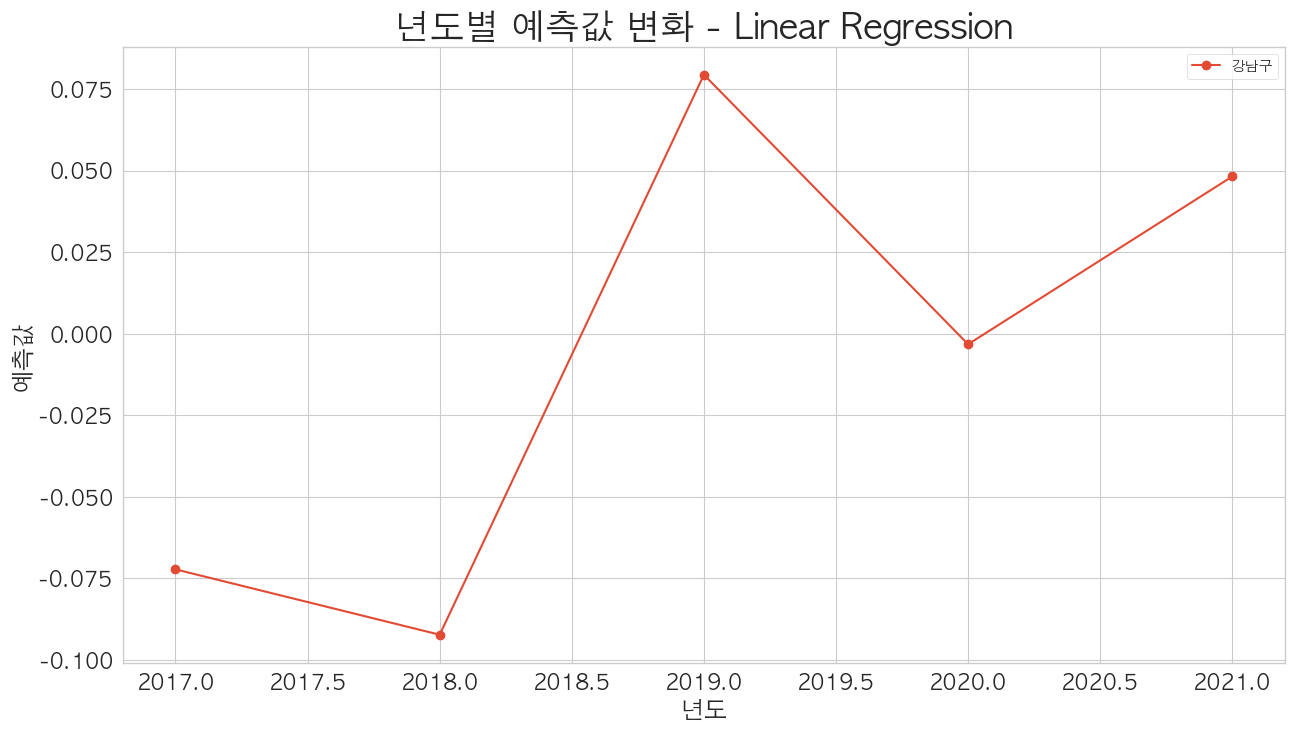

In [95]:
# plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

# gungu = df["시군구"].unique()[:5]
gungu = ['강남구']
# years = list(range(9))
years = list(range(2017, 2022))
# colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']
# colors = 'rainbow'

for i in range(len(gungu)):
    
    ax.plot(
        years,
        df[df['시군구'] == gungu[i]]['pred_cluster'],
        marker='o',
        label=gungu[i],
        # color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - Linear Regression', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)

plt.show()

In [48]:
# 강남구
df_ex = df[df['시군구']=='강남구']
df_ex

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
202,강남구,2017,103367,3456,56,33,0.0,-0.072213
203,강남구,2018,106802,2940,55,33,0.0,-0.092248
204,강남구,2019,93716,2749,53,33,0.0,0.079377
205,강남구,2020,101582,2356,49,33,0.0,-0.003235
206,강남구,2021,98106,2204,51,33,0.0,0.048208


(-0.1, 1.1)

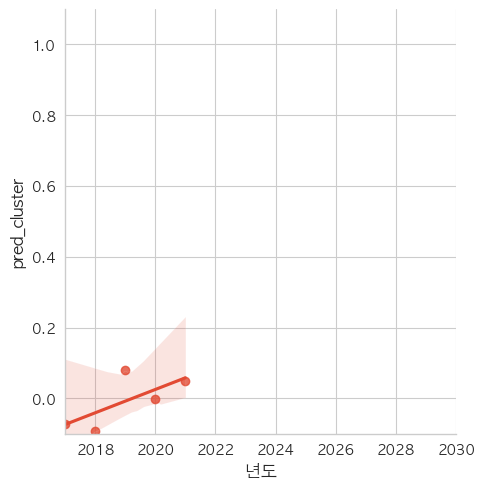

In [46]:
sns.lmplot(
    x='년도',
    y='pred_cluster',
    data=df[df['시군구']=='강남구']
)
plt.xlim(2017,2030)
plt.ylim(-0.1,1.1)

### 연습

In [73]:
# Feature, Target
data = df_ex[['년도']].to_numpy()
target = df_ex['pred_cluster'].to_numpy()

# 회귀 예측
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(data, target)
print(lr2.coef_, lr2.intercept_)

[0.03298556] -66.60587178950074


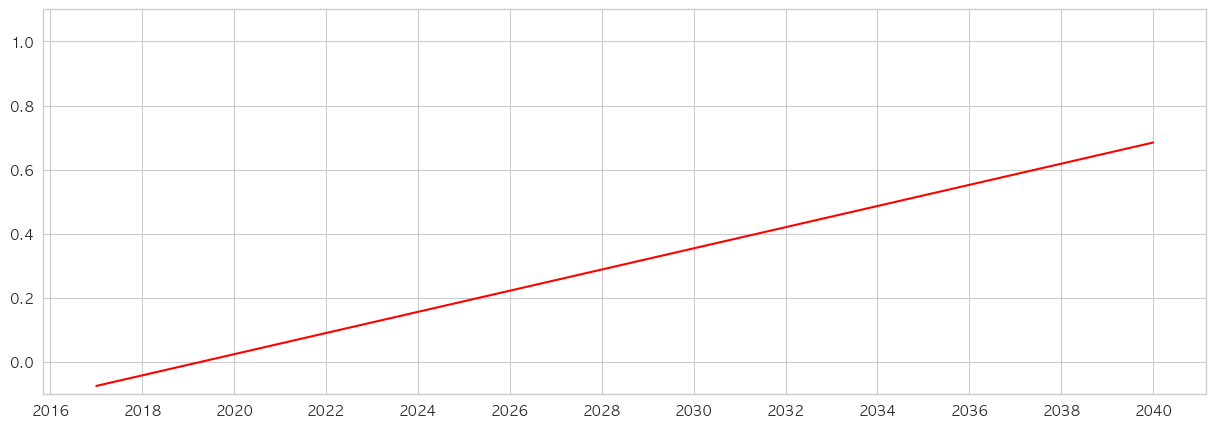

In [89]:
plt.figure(figsize=(15,5))
plt.plot([2017, 2040], [(2017)*float(lr2.coef_)+float(lr2.intercept_), (2040)*float(lr2.coef_)+float(lr2.intercept_)], c='red')
# plt.xlim(2016, 2042)
plt.ylim(-0.1, 1.1)
plt.xticks(ticks=range(2016, 2042, 2))
plt.show()

# 통합

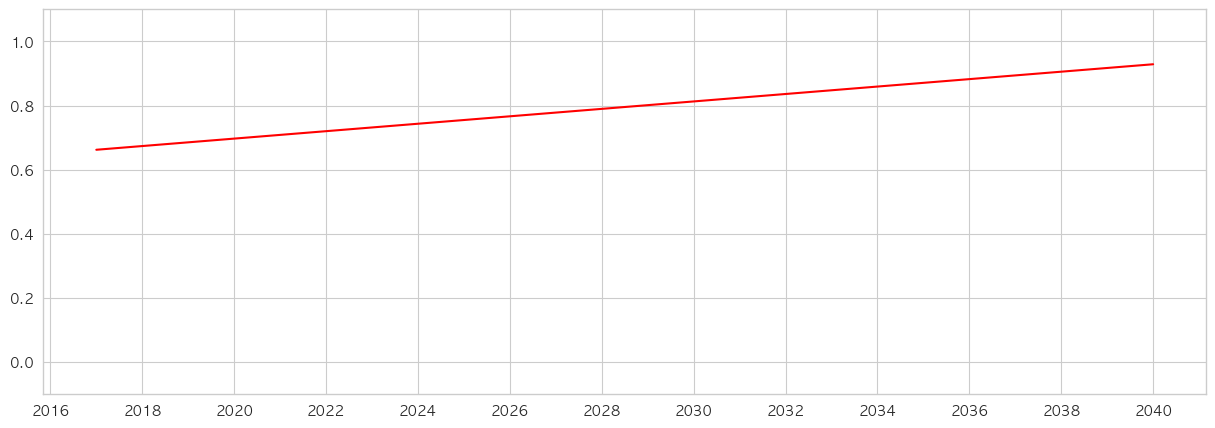

In [92]:
# 설정 값들
gungu = '강북구'
year_max = 2040

df_temp = df[df['시군구']==gungu]

# Feature, Target
data = df_temp[['년도']].to_numpy()
target = df_temp['pred_cluster'].to_numpy()

# 회귀 예측
from sklearn.linear_model import LinearRegression
lr_temp = LinearRegression()
lr_temp.fit(data, target)
# print(lr_temp.coef_, lr_temp.intercept_)

# 그래프 그리기
plt.figure(figsize=(15,5))
plt.plot([2017, year_max], [(2017)*float(lr_temp.coef_)+float(lr_temp.intercept_), (year_max)*float(lr_temp.coef_)+float(lr_temp.intercept_)], c='red')
# plt.xlim(2016, 2042)
plt.ylim(-0.1, 1.1)
plt.xticks(ticks=range(2016, year_max+1, 2))
plt.show()